write synthetic data 

In [1]:
%load_ext autoreload
%autoreload 2

# generate data

In [28]:
import numpy as np

true_w, true_b = 1, 1

N=100
np.random.seed(43)

epsion = 0.1 * np.random.rand(N,1)
x = np.random.rand(N, 1) # matrix N*1

y = true_w * x + true_b + epsion

[autoreload of data_preparation failed: Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/pytorchbook/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/pytorchbook/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/pytorchbook/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/olena.hlushchenko/work/pytorch/PyTorchStepByStep/my_practice/data_preparation.py", line 10, in <module>
    x_train_tensor = torch.as_tensor(x

plot scatter

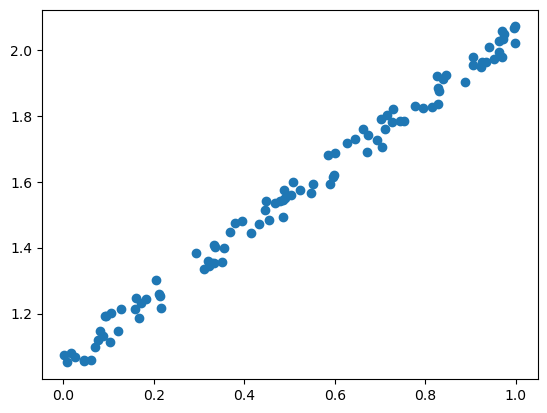

In [29]:
import matplotlib.pyplot as plt

plt.scatter(x,y)


# spli test-val and plot

In [30]:
np.arange(N)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [31]:
indx = np.arange(N)
np.random.shuffle(indx)

indx

array([51, 62, 27,  2, 76,  7, 54, 64, 67, 44, 14, 84, 90, 20, 59, 58, 21,
       55, 50, 28, 47, 12, 60, 96, 39, 85, 11,  4, 86, 52, 49, 79, 15, 43,
       35, 97,  3, 19, 57,  8, 42, 80, 69, 29, 87, 30,  0, 66, 94, 77,  1,
       31, 63, 25, 75, 95, 81, 17, 36, 32, 37, 46, 56, 38, 82, 33, 22, 16,
       65,  6, 23, 26, 53, 99, 70,  5, 83, 13, 48, 73, 93, 91, 78, 89, 92,
       88, 18, 45, 10, 71, 68, 40, 24, 98, 61, 34, 41, 72, 74,  9])

In [32]:
x_train = x[indx[:round(N*0.8)]]
y_train = y[indx[:round(N*0.8)]]

x_val = x[indx[round(N*0.8):]]
y_val = y[indx[round(N*0.8):]]




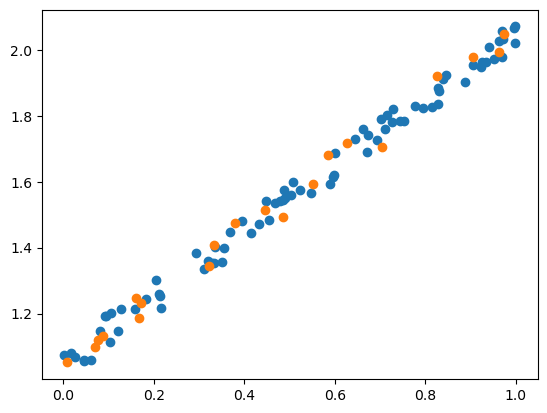

In [33]:
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train, label='train')
plt.scatter(x_val,y_val, label='val')

# Manual regression

In [21]:
w,b = np.random.rand(1), np.random.rand(1)

print(b,w)

[0.50076332] [0.86952669]


regress using MSE

In [61]:
np.random.seed(42)

alpha = 0.1
w,b = np.random.rand(1), np.random.rand(1)
loss_list = []

for epoch in range(0, 10000):
    yhat = w*x_train +b
    err = (yhat - y_train)
    
    loss = (err**2).mean()
    

    db = 2*err.mean()
    dw = 2* (x_train*err).mean()
    
    
    loss_list.append((epoch, loss))

    b = b - alpha*db
    w = w - alpha*dw
    # break

print( b, w)
    

    

[1.05123868] [0.99767966]


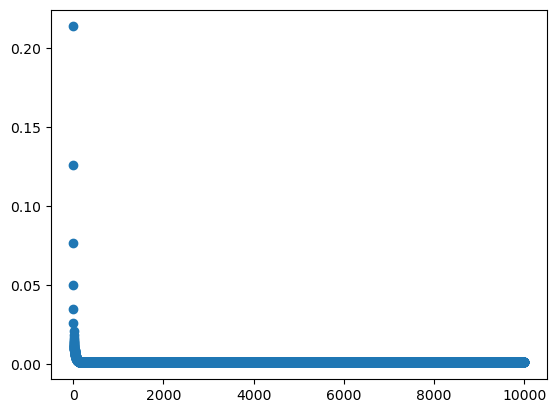

In [68]:
e,l  = zip(*loss_list)

plt.scatter(e,l, label='loss')

# Regression with pytorch

In [76]:
import torch

np.random.rand(42)
torch.manual_seed(42)

N=10000
device = 'cude' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)

lr=0.01

model = torch.nn.Sequential(torch.nn.Linear(1,1)).to(device)
optimiser = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss(reduction='mean')

for epoch in range(0, N):
    model.train()

    yhat = model(x_train_tensor)

    loss = loss_fn(yhat, y_train_tensor)

    loss.backward()

    optimiser.step()
    optimiser.zero_grad()

print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.9976]])), ('0.bias', tensor([1.0513]))])


# Incapsulate steps

In [86]:
%run -i data_preparation.py
%run -i model_configuration.py
%run -i model_training.py

model.state_dict()

Done 'data_preparation.py'
Done 'model_configuration.py'
Done 'model_training.py'


OrderedDict([('0.weight', tensor([[0.9767]])), ('0.bias', tensor([1.0640]))])